 # Regularized Linear Models

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_regression

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [41]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 110)
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [42]:
print(df.info())
print(f'''
      shape: {df.shape}''')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB
None

      shape: (3140, 108)


In [43]:
aux = list(df.columns[df.dtypes=='object'])
print(f'Columns dtypes == "object": {aux}')

Columns dtypes == "object": ['COUNTY_NAME', 'STATE_NAME']


In [44]:
unique_var = df.nunique() == 1

if any(unique_var): 
    for col in unique_var.index[unique_var]:  
        print(f"The variable {col} contains only one category.")  
else: 
    print(f"There's no constant variable, or variable with only one category to clean.")

There's no constant variable, or variable with only one category to clean.


In [45]:
data_types = df.dtypes
numeric_columns = [c for c in list(data_types[data_types != "object"].index) if c != "Heart disease_number"]

In [46]:
# keeping only numeric columns and scale them 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[numeric_columns])
df_scaled = pd.DataFrame(data_scaled, index=df.index, columns=numeric_columns)
df_scaled

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,-1.940874,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,-0.122010,1.515069,-0.138129,0.263445,-0.176461,-1.067889,-0.156294,-0.503639,-0.167598,-0.724248,-0.155953,-0.475265,-0.051455,0.710731,-0.196442,-0.241496,-0.124761,-0.115433,-0.087858,-0.030480,-0.165397,-0.191608,-0.145679,-0.154872,-0.316235,0.250655,-0.284799,0.344613,-0.513170,0.060785,-0.045366,-0.117586,-0.132905,-0.158201,-0.145939,-0.333019,-0.234382,-0.447577,0.649528,-0.125899,-0.221739,-0.202843,-0.043632,0.472531,0.370220,0.566185,-0.151210,-0.151024,-0.152525,-0.353571,0.472531,1.468943,-0.894491,-0.934081,-0.856179,-0.846273,-0.017028,0.110809,-0.154944,-0.256149,-0.117965,-0.171894,-0.173594,-0.175321,-0.210637,-0.143727,-0.175907,-1.013112,-1.936434,-0.952441,-0.148472,0.126376,0.116487,0.087963,-0.133552,0.172860,0.177849,0.154082,-0.135426,-0.402548,-0.380391,-0.392897,-0.211219,-0.256304,-0.206071,-0.138900,-0.063696,-0.071720,-0.089834,-0.129902,-0.609615,-0.582796,-0.669652,-0.147523,-1.082865
1,-1.940742,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,0.332513,0.715673,0.382732,0.153177,0.521999,0.215895,0.676174,0.543366,0.442092,-0.284722,0.466348,0.170748,0.093946,-0.027772,0.067848,-0.203651,-0.083125,-0.141497,-0.049532,-0.076506,0.094029,-0.219210,0.341296,1.518514,-0.057592,-0.264720,-0.024296,-0.173131,-0.282330,2.122197,2.080476,0.153846,0.427106,0.424717,0

In [ ]:
# define independent and dependent variables
X = df_scaled
y = df['Heart disease_number']

X_train, X_test = train_test_split(X, train_size=0.8, random_state=42)  

y_train = y.loc[X_train.index] # maatching indexes of y_train e y_test with X_train and X_test
y_test = y.loc[X_test.index]

In [48]:
# XGBoost to find teh important features
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_model.feature_importances_ * 100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)

# select the 30 most important features based on importance
aux = df_imp.sort_values('Importance', ascending=False).head(30)
df_imp = df_imp.loc[aux.index]
df_imp

,Feature,Importance
84,anycondition_number,49.312778
103,CKD_number,19.477835
74,ICU Beds_x,9.780962
80,county_pop2018_18 and older,5.093907
99,diabetes_number,3.301694
95,COPD_number,2.700190
24,Native American/American Indian-alone pop,2.626875
18,80+,1.949269
88,Obesity_number,1.537006
1,TOT_POP,1.451955


In [49]:
# keeping only the important features
X_train = X_train[df_imp.Feature.values]
X_test = X_test[df_imp.Feature.values]

In [50]:
# VIF for multicollinearity analysis
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

anycondition_number                          1.074260e+08
CKD_number                                   4.117548e+07
ICU Beds_x                                   1.151713e+05
county_pop2018_18 and older                  7.080980e+08
diabetes_number                              1.035242e+07
COPD_number                                  6.540186e+06
Native American/American Indian-alone pop    2.434501e+04
80+                                          1.391505e+08
Obesity_number                               4.774184e+07
TOT_POP                                      6.737235e+08
Population Aged 60+                          1.481311e+09
Unemployed_2018                              3.688654e+05
70-79                                        3.392403e+07
POVALL_2018                                  5.924547e+06
0-9 y/o % of total pop                       4.173348e+02
Unemployment_rate_2018                       2.245307e+02
Total nurse practitioners (2019)             2.352473e+05
High school di

In [51]:
print(X_train.shape)
print(y.shape)

(2512, 30)
(3140,)


In [ ]:
# fitting the model to an OLS
X_train = sm.add_constant(X_train)  # adding a constant term for the model
model = sm.OLS(y_train, X_train).fit()

# cooks distance to identify influential observations
cooks_distance = model.get_influence().cooks_distance

In [53]:
# running XGBoost again to verify feature importance
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_model.feature_importances_ * 100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp

,Feature,Importance
2,CKD_number,49.598774
3,ICU Beds_x,13.075397
1,anycondition_number,11.521913
6,COPD_number,8.090240
5,diabetes_number,4.233103
8,80+,3.690875
9,Obesity_number,2.616714
11,Population Aged 60+,2.288280
13,70-79,1.987938
4,county_pop2018_18 and older,1.252883


In [54]:
# cutoff based on importance scores
df_imp[df_imp.Importance >= 0.5].Feature.values

array(['CKD_number', 'ICU Beds_x', 'anycondition_number', 'COPD_number',
       'diabetes_number', '80+', 'Obesity_number', 'Population Aged 60+',
       '70-79', 'county_pop2018_18 and older', 'Unemployed_2018'],
      dtype=object)

In [55]:
# keep the features meeting the cutoff and dropping the others
X_train = X_train[df_imp[df_imp.Importance >= 0.5].Feature.values]
X_test = X_test[df_imp[df_imp.Importance >= 0.5].Feature.values]

In [56]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

CKD_number                     6.426795e+06
ICU Beds_x                     4.979665e+03
anycondition_number            3.706144e+07
COPD_number                    1.607251e+06
diabetes_number                2.428414e+06
80+                            3.392447e+06
Obesity_number                 1.453248e+07
Population Aged 60+            1.767648e+07
70-79                          2.996488e+06
county_pop2018_18 and older    4.195906e+06
Unemployed_2018                1.379121e+05
dtype: float64

In [57]:
# heatmap
X_corr = X_train.copy()
corr = X_corr.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,CKD_number,ICU Beds_x,anycondition_number,COPD_number,diabetes_number,80+,Obesity_number,Population Aged 60+,70-79,county_pop2018_18 and older,Unemployed_2018
CKD_number,1.000,0.918,0.995,0.992,0.996,0.980,0.990,0.991,0.987,0.995,0.987
ICU Beds_x,0.918,1.000,0.920,0.926,0.908,0.900,0.920,0.913,0.906,0.916,0.903
anycondition_number,0.995,0.920,1.000,0.992,0.993,0.966,0.999,0.983,0.979,0.992,0.985
COPD_number,0.992,0.926,0.992,1.000,0.985,0.975,0.988,0.987,0.986,0.983,0.973
diabetes_number,0.996,0.908,0.993,0.985,1.000,0.968,0.989,0.981,0.974,0.990,0.986
80+,0.980,0.900,0.966,0.975,0.968,1.000,0.956,0.995,0.994,0.977,0.955
Obesity_number,0.990,0.920,0.999,0.988,0.989,0.956,1.000,0.976,0.971,0.988,0.982
Population Aged 60+,0.991,0.913,0.983,0.987,0.981,0.995,0.976,1.000,0.997,0.991,0.971
70-79,0.987,0.906,0.979,0.986,0.974,0.994,0.971,0.997,1.000,0.985,0.963
county_pop2018_18 and older,0.995,0.916,0.992,0.983,0.990,0.977,0.988,0.991,0.985,1.000,0.986


In [58]:
# drop features with an important correlation or low relevance
X_train.drop(['Obesity_number', 'anycondition_number', 'diabetes_number','70-79','80+'], axis=1, inplace=True)
X_test.drop(['Obesity_number', 'anycondition_number', 'diabetes_number','70-79','80+'], axis=1, inplace=True)


C:\Program Files\KMSpico\temp\ipykernel_2168\159617717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(['Obesity_number', 'anycondition_number', 'diabetes_number','70-79','80+'], axis=1, inplace=True)


In [59]:
X_corr = X_train.copy()
corr = X_corr.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,CKD_number,ICU Beds_x,COPD_number,Population Aged 60+,county_pop2018_18 and older,Unemployed_2018
CKD_number,1.000,0.918,0.992,0.991,0.995,0.987
ICU Beds_x,0.918,1.000,0.926,0.913,0.916,0.903
COPD_number,0.992,0.926,1.000,0.987,0.983,0.973
Population Aged 60+,0.991,0.913,0.987,1.000,0.991,0.971
county_pop2018_18 and older,0.995,0.916,0.983,0.991,1.000,0.986
Unemployed_2018,0.987,0.903,0.973,0.971,0.986,1.000


In [60]:
# training a linear regression model
m_lineal = LinearRegression().fit(X_train, y_train)
y_pred_linear_train = m_lineal.predict(X_train)
y_pred_linear_test = m_lineal.predict(X_test)

In [61]:
def get_metrics(yhat, y_test, yhat_train, y_train):
    metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train) * 100
    metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat) * 100
    metrics_diff = list(map(lambda x: x[1] - x[0], zip(metrics_train, metrics_test)))
    return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Difference'])

In [62]:
get_metrics(y_pred_linear_test, y_test, y_pred_linear_train, y_train)

,R2,Median AE,MAPE
Train set,0.997999,78.167328,9.161614
Test set,0.995583,69.744090,8.495599
Difference,-0.002417,-8.423238,-0.666015


In [63]:
m_lineal.coef_

array([ 7162.03404257,  -329.27839736,  8686.45932283,  1583.66456809,
         587.7770527 , -2129.88312066])

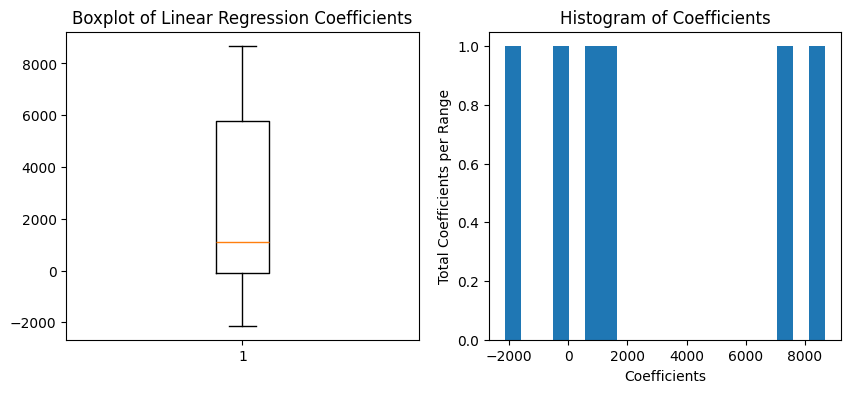

In [64]:
# boxplot of linear egression coefficients
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_lineal.coef_)
plt.title('Boxplot of Linear Regression Coefficients')
plt.subplot(1, 2, 2)
plt.hist(m_lineal.coef_, 20)
plt.xlabel('Coefficients')
plt.ylabel('Total Coefficients per Range')
plt.title('Histogram of Coefficients')
plt.show()


In [65]:
# start working with Lasso model
m_lasso = LassoCV(alphas=np.logspace(-6,6,10), cv=5, random_state=42, n_jobs=-1).fit(X_train, y_train)

In [66]:
y_pred_lasso_train = m_lasso.predict(X_train)
y_pred_lasso_test = m_lasso.predict(X_test)

In [67]:
get_metrics(y_pred_linear_test, y_test, y_pred_linear_train, y_train)

,R2,Median AE,MAPE
Train set,0.997999,78.167328,9.161614
Test set,0.995583,69.744090,8.495599
Difference,-0.002417,-8.423238,-0.666015


In [68]:
get_metrics(y_pred_lasso_test, y_test, y_pred_lasso_train, y_train)

,R2,Median AE,MAPE
Train set,0.997503,108.705386,15.291350
Test set,0.994891,107.841291,14.155234
Difference,-0.002612,-0.864094,-1.136117


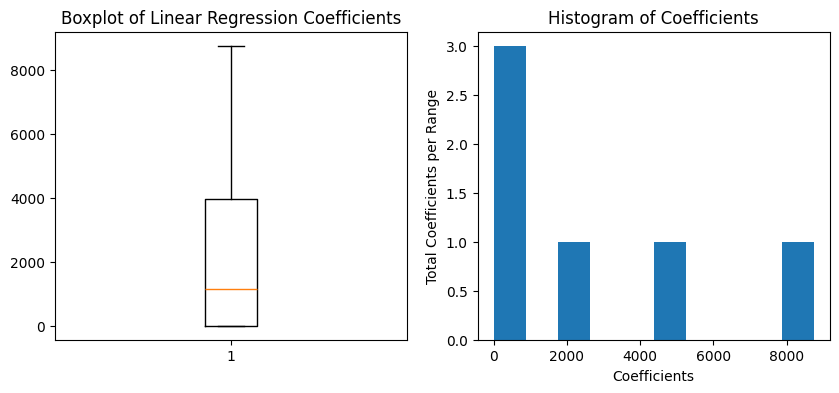

In [69]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_lasso.coef_)
plt.title('Boxplot of Linear Regression Coefficients')
plt.subplot(1, 2, 2)
plt.hist(m_lasso.coef_,10)
plt.xlabel('Coefficients')
plt.ylabel('Total Coefficients per Range')
plt.title('Histogram of Coefficients')
plt.show()


In [70]:
print(f'Percentaje of variables dropped: {round(len(m_lasso.coef_[np.abs(m_lasso.coef_)==0])/len(m_lasso.coef_)*100,2)}%')
print(f'The model utilizes: {len(m_lasso.coef_[np.abs(m_lasso.coef_)>0])} variables.')


Percentaje of variables dropped: 50.0%
The model utilizes: 3 variables.


In [71]:
# Starting to work with Ridge Model
m_ridge = RidgeCV(alphas=np.logspace(-6,6,10), cv=5).fit(X_train, y_train)


In [72]:
y_pred_ridge_train = m_ridge.predict(X_train)
y_pred_ridge_test = m_ridge.predict(X_test)


In [73]:
print(f'Ridge Method Metrics (Test): ')
get_metrics(y_pred_ridge_test, y_test, y_pred_ridge_train, y_train)

Ridge Method Metrics (Test): 


,R2,Median AE,MAPE
Train set,0.997999,77.870573,9.191050
Test set,0.995592,70.077703,8.517898
Difference,-0.002407,-7.792870,-0.673152


In [74]:
print(f'TO COMPARE. Lasso Method Metrics (Test): ')
get_metrics(y_pred_lasso_test, y_test, y_pred_lasso_train, y_train)

TO COMPARE. Lasso Method Metrics (Test): 


,R2,Median AE,MAPE
Train set,0.997503,108.705386,15.291350
Test set,0.994891,107.841291,14.155234
Difference,-0.002612,-0.864094,-1.136117


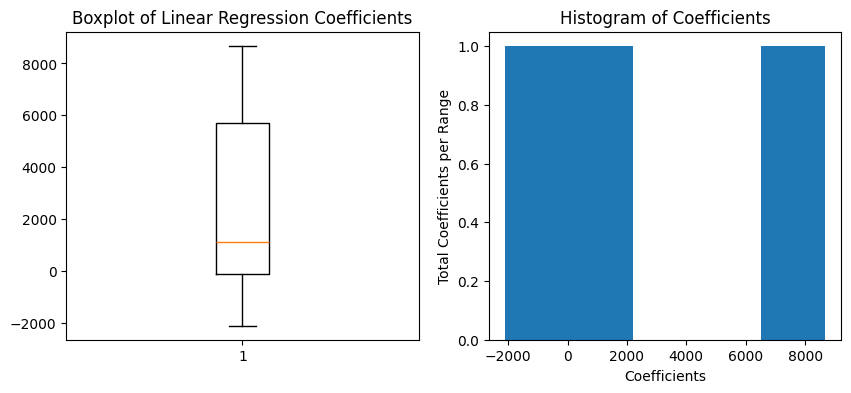

In [75]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_ridge.coef_)
plt.title('Boxplot of Linear Regression Coefficients')
plt.subplot(1, 2, 2)
plt.hist(m_ridge.coef_,10)
plt.xlabel('Coefficients')
plt.ylabel('Total Coefficients per Range')
plt.title('Histogram of Coefficients')
plt.show()

In [76]:
print(f'Percentaje of variables dropped: {round(len(m_ridge.coef_[np.abs(m_ridge.coef_)==0])/len(m_ridge.coef_)*100,2)}%')
print(f'The model utilizes:  {len(m_ridge.coef_[np.abs(m_ridge.coef_)>0])} variables.')

Percentaje of variables dropped: 0.0%
The model utilizes:  6 variables.
